In [1]:
# importing the packages

import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt 
%matplotlib inline
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, BaggingClassifier, AdaBoostClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import roc_auc_score, classification_report, confusion_matrix, accuracy_score, f1_score
from sklearn.model_selection import StratifiedKFold, KFold, train_test_split

In [2]:
train =pd.read_csv('insure2_train.csv')
test = pd.read_csv('insure2_test.csv')

In [3]:
train.head()

,Gender,Trainings_Attended,Year_of_birth,Last_performance_score,Year_of_recruitment,Targets_met,Previous_Award,Training_score_average,Foreign_schooled,Past_Disciplinary_Action,Previous_IntraDepartmental_Movement,Promoted_or_Not,divisional,statea,marital
0,0,2,1986,12.5,2011,1,0,41,0,0,0,0,2,0,2
1,1,2,1991,12.5,2015,0,0,52,1,0,0,0,2,1,12
2,1,2,1987,7.5,2012,0,0,42,1,0,0,0,2,1,12
3,1,3,1982,2.5,2009,0,0,42,1,0,0,0,3,1,12
4,1,3,1990,7.5,2012,0,0,77,1,0,0,0,3,1,12


In [4]:
test.head()

,Gender,Trainings_Attended,Year_of_birth,Last_performance_score,Year_of_recruitment,Targets_met,Previous_Award,Training_score_average,Foreign_schooled,Past_Disciplinary_Action,Previous_IntraDepartmental_Movement,divisional,statea,marital
0,1,2,1976,7.5,2017,0,0,65,1,0,0,2,1,12
1,1,2,1991,0.0,2018,0,0,69,1,0,0,2,1,12
2,1,2,1984,7.5,2012,0,0,76,1,0,0,2,1,12
3,1,2,1984,2.5,2009,0,0,52,0,0,0,2,0,2
4,1,2,1983,7.5,2014,1,0,69,1,0,0,2,1,12


In [5]:
X = train.drop('Promoted_or_Not', axis=1)
y = train.Promoted_or_Not

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
# splitting my train & test data into train & validation

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=42)

In [8]:
categorical_features_indices = np.where(X.dtypes != np.float)[0]

In [9]:
model=LGBMClassifier(iterations=1000, #leaf_estimation_iterations=10,#800
                              learning_rate=0.1,
                              depth=4,loss_function='MultiClass',#,scale_pos_weight=200,
                             #l2_leaf_reg=5,
                             bootstrap_type='Bernoulli',
                              subsample=0.9,
                              eval_metric='AUC',
                              metric_period=20,
                                   #class_weights=0,
                              #od_type='Iter',
                              #od_wait=45,
                              #random_seed=10,
                              allow_writing_files=False)

In [10]:

model.fit(X,y)

[LightGBM] [Warning] Unknown parameter: loss_function
[LightGBM] [Warning] Unknown parameter: iterations
[LightGBM] [Warning] Unknown parameter: depth
[LightGBM] [Warning] Unknown parameter: bootstrap_type
[LightGBM] [Warning] Unknown parameter: eval_metric
[LightGBM] [Warning] Unknown parameter: metric_period
[LightGBM] [Warning] Unknown parameter: allow_writing_files


LGBMClassifier(allow_writing_files=False, boosting_type='gbdt',
               bootstrap_type='Bernoulli', class_weight=None,
               colsample_bytree=1.0, depth=4, eval_metric='AUC',
               importance_type='split', iterations=1000, learning_rate=0.1,
               loss_function='MultiClass', max_depth=-1, metric_period=20,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=0.9, subsample_for_bin=200000, subsample_freq=0)

In [11]:

y_pred=model.predict_proba(test)[:, 1]

In [12]:
from sklearn.metrics import roc_auc_score

In [13]:

#printing my prediction
print(roc_auc_score(y_val, model.predict_proba(X_val)[:, 1]))

0.8903298792660901


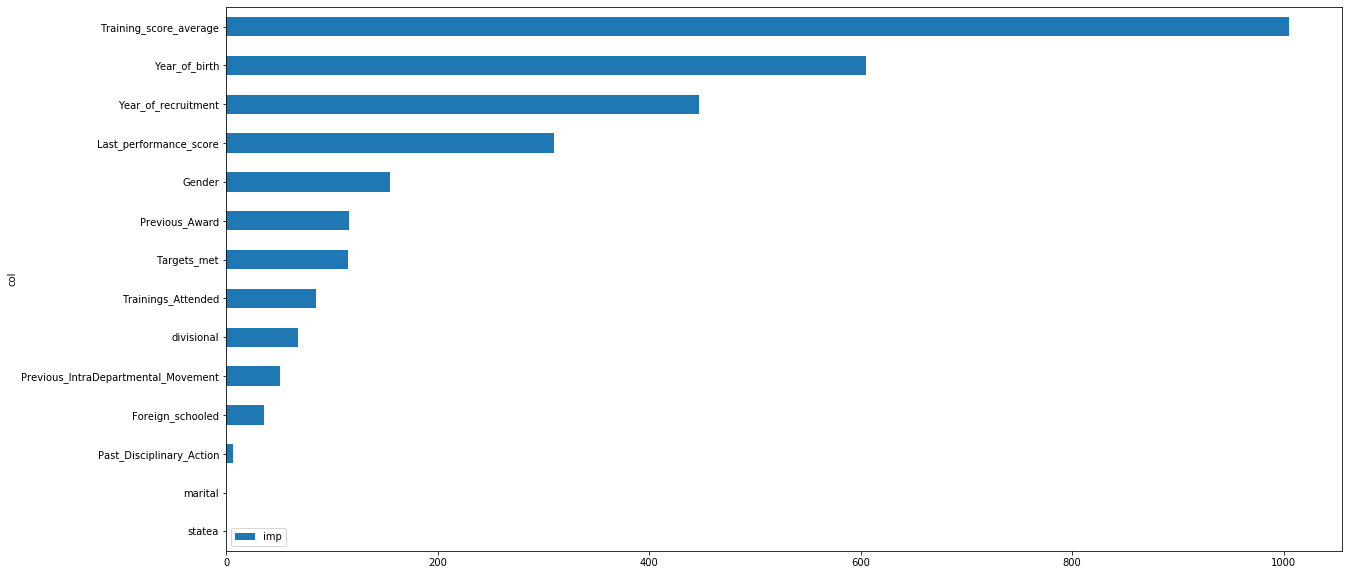

In [14]:

fea_imp = pd.DataFrame({'imp':model.feature_importances_, 'col': X.columns})
fea_imp = fea_imp.sort_values(['imp', 'col'], ascending=[True, False]).iloc[-30:]
_ = fea_imp.plot(kind='barh', x='col', y='imp', figsize=(20, 10))
plt.savefig('catboost_feature_importance.png')